# Class4-Data_Visualization-Week20

__Data:__ https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

## We want to answer these questions by visualizations (I used many methods here. You can check them below.)

* Global Suicides(per 100K)-trend over time 1985-2016
* Global Suicides(per 100K) by Continent
* Global Suicides(per 100k) by Gender and trend over time 1985-2016
* Population-gdp_per_capita Plot
* Correlation between GDP(per Capita) and suicides per 100k
* Generation hue Gender Counter
* Which age of people suicide a most
* Which generation of people suicide a most

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv
/kaggle/input/country-to-continent/countryContinent.csv


In [72]:
df = pd.read_csv("/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv")
df.sample(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
2085,Austria,2009,male,5-14 years,3,439629,0.68,Austria2009,NaN,"400,172,297,861",50356,Generation Z
21212,Russian Federation,2012,male,75+ years,1486,2211989,67.18,Russian Federation2012,NaN,"2,210,256,976,945",16413,Silent
8026,Ecuador,2012,male,5-14 years,39,1544899,2.52,Ecuador2012,0.727,"87,924,544,000",6364,Generation Z
11562,Hungary,2007,female,35-54 years,196,1412746,13.87,Hungary2007,NaN,"139,850,794,387",14609,Boomers
15803,Maldives,2011,female,5-14 years,0,28689,0.00,Maldives2011,0.690,"2,774,351,760",8135,Generation Z
3863,Belize,1991,female,25-34 years,0,13700,0.00,Belize1991,NaN,"444,720,750",2742,Boomers
982,Armenia,1991,female,5-14 years,0,349500,0.00,Armenia1991,NaN,"2,068,526,522",640,Millenials
913,Argentina,2012,male,15-24 years,745,3480902,21.40,Argentina2012,0.831,"545,982,375,701",14203,Millenials
18426,Panama,2004,female,25-34 years,9,268312,3.35,Panama2004,NaN,"15,013,381,700",5144,Generation X
1741,Australia,2012,male,55-74 years,396,2162980,18.31,Australia2012,0.932,"1,543,411,012,580",72669,Boomers


In [73]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,27820,101,Austria,382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,27820.0,NaN,NaN,NaN,2001.258375,8.469055,1985.0,1995.0,2002.0,2008.0,2016.0
sex,27820,2,female,13910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,27820,6,15-24 years,4642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
suicides_no,27820.0,NaN,NaN,NaN,242.574407,902.047917,0.0,3.0,25.0,131.0,22338.0
population,27820.0,NaN,NaN,NaN,1844793.617398,3911779.441756,278.0,97498.5,430150.0,1486143.25,43805214.0
suicides/100k pop,27820.0,NaN,NaN,NaN,12.816097,18.961511,0.0,0.92,5.99,16.62,224.97
country-year,27820,2321,Iceland2006,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HDI for year,8364.0,NaN,NaN,NaN,0.776601,0.093367,0.483,0.713,0.779,0.855,0.944
gdp_for_year ($),27820,2321,"35,838,588,170",12,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

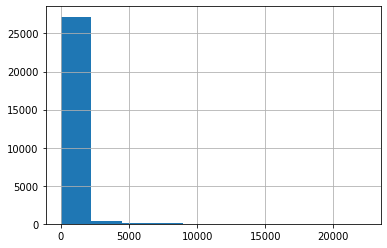

In [74]:
df.suicides_no.hist()

Rename the columns.

In [76]:
df.rename(columns={"suicides/100k pop":"suicides_pop","HDI for year":"HDI_for_year",
                  " gdp_for_year ($) ":"gdp_for_year"," gdp_per_capita ($) ":"gdp_per_capita",}, inplace=True)
print(df.columns)


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_pop', 'country-year', 'HDI_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')


Change the comma in gdp to nothing to calculate it further easily. And to sort the age arrange the years.

In [4]:
df["gdp_for_year"] = df["gdp_for_year"].str.replace(",","").astype(np.int64)
df["age"] = df["age"].str.replace("5-14 years","05-14 years")

First of all, we can check the suicide rate over time globally. 

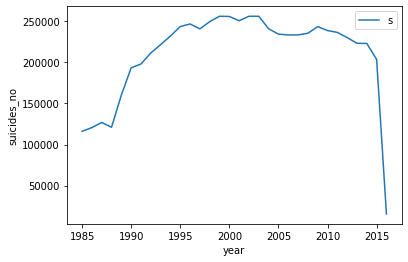

In [5]:
df_year = pd.DataFrame(df.groupby("year")["suicides_no"].sum())
df_year.reset_index(inplace=True)
sns.lineplot(x= df_year['year'], y=df_year['suicides_no'], ci = None)
plt.legend('suicide over year')
plt.show()

As we can see, generally the number suicide is arround 15000 to 25000 between the years 1992-2015

In [6]:
df_suicide = df.copy()
df_suicide

,country,year,sex,age,suicides_no,population,suicides_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,63067077179,2309,Silent
27817,Uzbekistan,2014,male,05-14 years,60,2762158,2.17,Uzbekistan2014,0.675,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,05-14 years,44,2631600,1.67,Uzbekistan2014,0.675,63067077179,2309,Generation Z


In [7]:
df_country = pd.read_csv("/kaggle/input/country-to-continent/countryContinent.csv")
df_country

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,�land Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0
...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,9.0,61.0
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,2.0,15.0
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,142.0,145.0
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Eastern Africa,2.0,14.0


In [8]:
def find_mismatch (array_1, array_2, only_out=True):
    for i in array_1.unique():
         if i in array_2.unique():
            pass
         else:
            print("Not have :",i)
            
    
find_mismatch(df.country, df_country.country, True)

Not have : Macau
Not have : Republic of Korea
Not have : Saint Vincent and Grenadines
Not have : United Kingdom
Not have : United States


In [9]:
df_country.loc[df_country.country.str.contains("Maca"),'country'] = 'Macau'
df_country.loc[118,'country'] = 'Republic of Korea'
df_country.loc[df_country.country.str.contains("Vincent"),'country'] = 'Saint Vincent and Grenadines'
df_country.loc[df_country.country.str.contains("King"),'country'] = 'United Kingdom'
df_country.loc[df_country.country.str.contains("United States of America"),'country'] = 'United States'

find_mismatch(df.country, df_country.country, True)

In [10]:
df = df.merge(df_country[['country', 'continent', 'code_3']])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27820 entries, 0 to 27819
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   sex             27820 non-null  object 
 3   age             27820 non-null  object 
 4   suicides_no     27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicides_pop    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   HDI_for_year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  int64  
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
 12  continent       27820 non-null  object 
 13  code_3          27820 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 3.2+ MB


In [11]:
df_cont = pd.DataFrame(df.groupby("continent")['suicides_no'].sum()).reset_index()
df_cont

,continent,suicides_no
0,Africa,11355
1,Americas,1787619
2,Asia,1456148
3,Europe,3408447
4,Oceania,84851


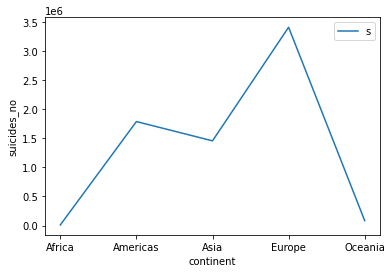

In [12]:
sns.lineplot(x= df_cont['continent'], y=df_cont['suicides_no'])
plt.legend('suicide per continent')
plt.show()

 As we can see, most suicedes has been commited in Europe Asia and America. Now we can check the suicide rate of men and women seperately to see which gender is more aimed to suicide/. 

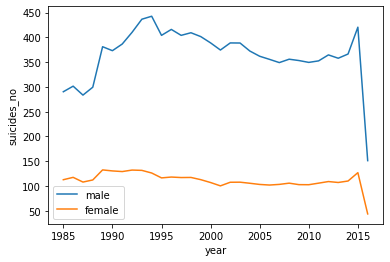

In [13]:
df_men = df[df.sex == "male"]
df_women = df[df.sex == "female"]
sns.lineplot(x= df_men.year, y=df.suicides_no, ci = None)
sns.lineplot(x=df_women.year, y=df.suicides_no, ci = None)
plt.legend(["male", 'female'])
plt.show()

As we can see in the graph, males are more tend to suicide. There could be lots of reasons. Let's check the age.

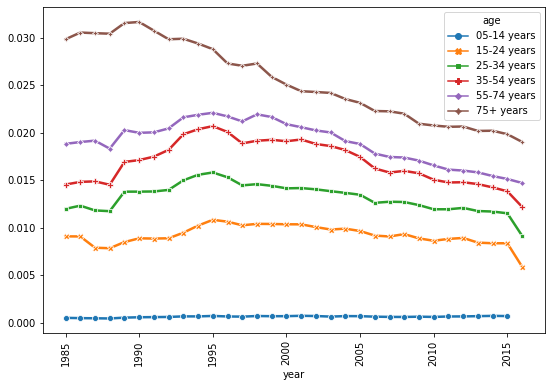

In [14]:
idx = ["suicides_no", "population"]
df_age = df.groupby(["year","age"])[idx].sum()
df_reset = df_age.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot(x="year", y=df_reset.suicides_no*100/df_reset.population, hue = "age",
             data = df_reset, linewidth = 2.5, style = "age", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()

As seen above graph, 75+ years are most tend to suicide.

# Population-gdp_per_capita Plot

In [18]:
df

,country,year,sex,age,suicides_no,population,suicides_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation,continent,code_3
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X,Europe,ALB
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent,Europe,ALB
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X,Europe,ALB
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation,Europe,ALB
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers,Europe,ALB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,63067077179,2309,Generation X,Asia,UZB
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,63067077179,2309,Silent,Asia,UZB
27817,Uzbekistan,2014,male,05-14 years,60,2762158,2.17,Uzbekistan2014,0.675,63067077179,2309,Generation Z,Asia,UZB
27818,Uzbekistan,2014,female,05-14 years,44,2631600,1.67,Uzbekistan2014,0.675,63067077179,2309,Generation Z,Asia,UZB


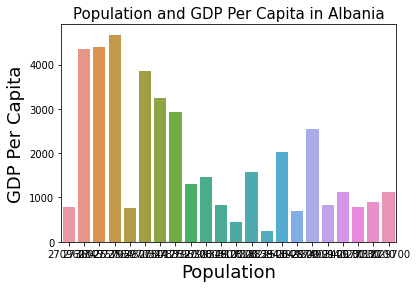

None

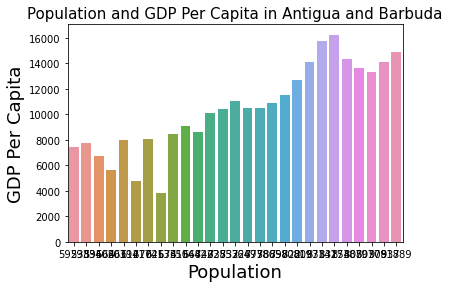

None

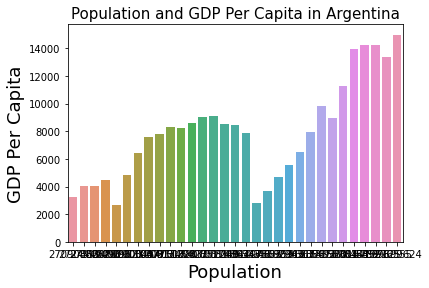

None

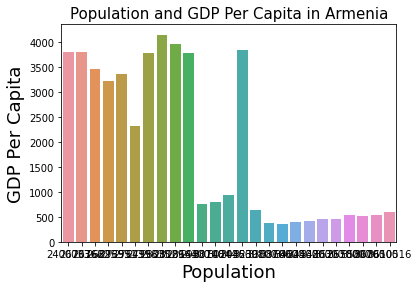

None

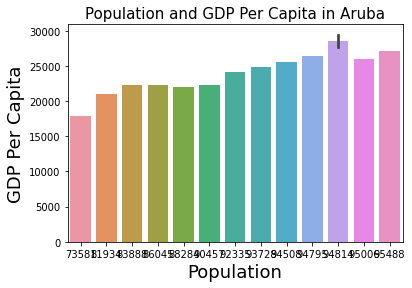

None

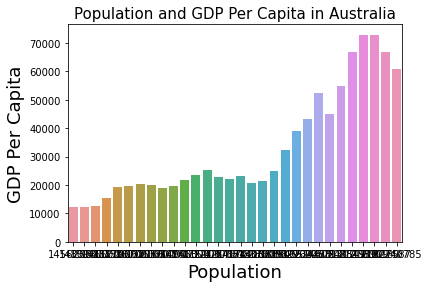

None

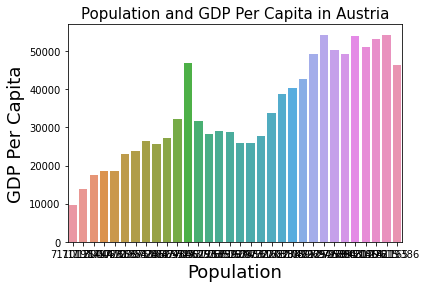

None

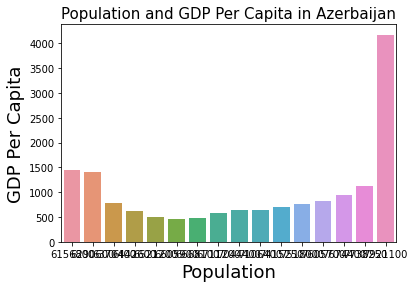

None

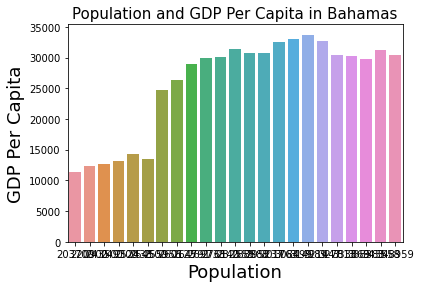

None

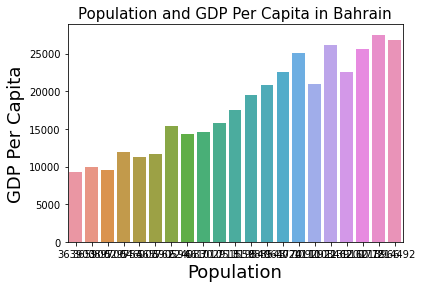

None

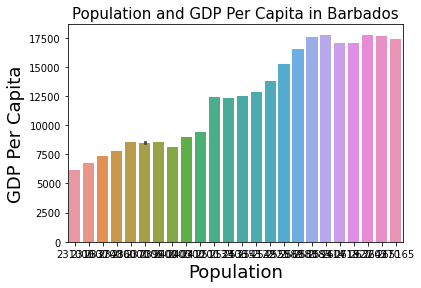

None

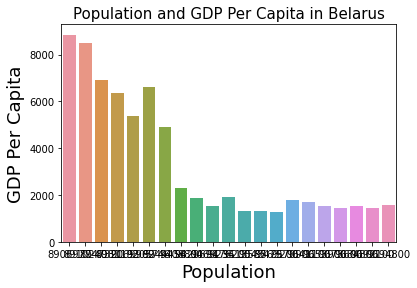

None

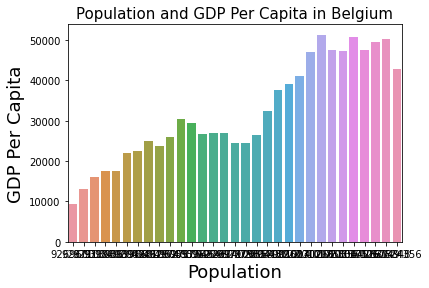

None

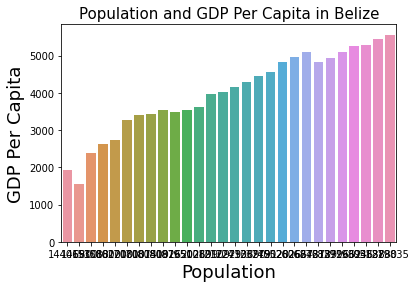

None

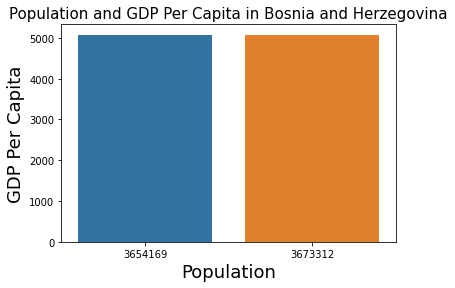

None

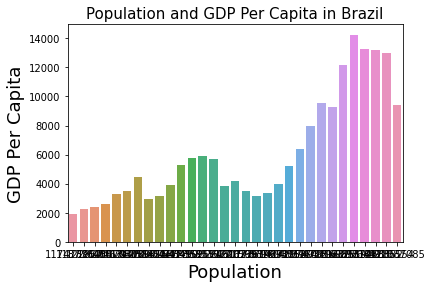

None

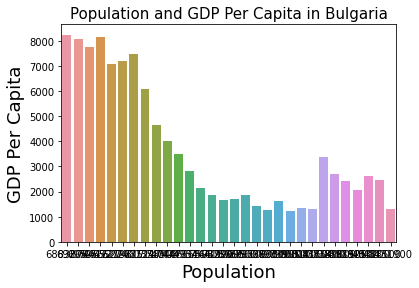

None

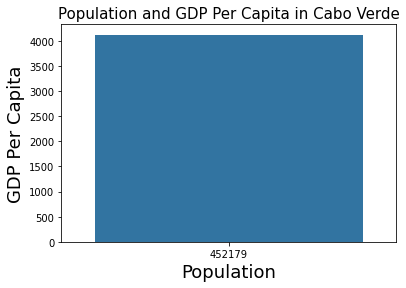

None

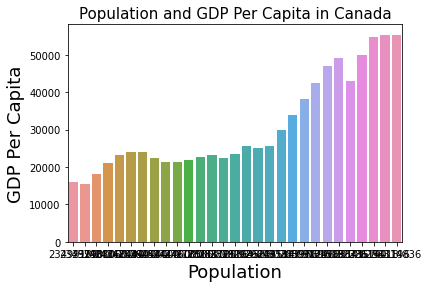

None

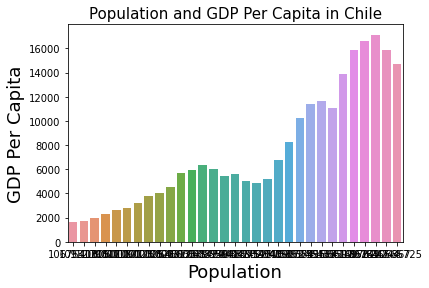

None

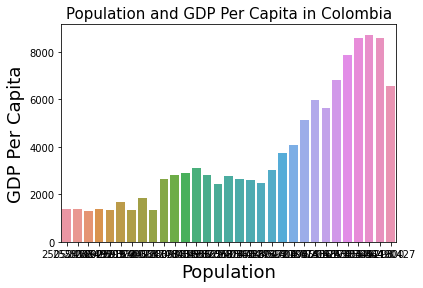

None

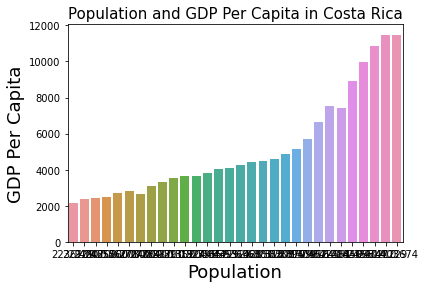

None

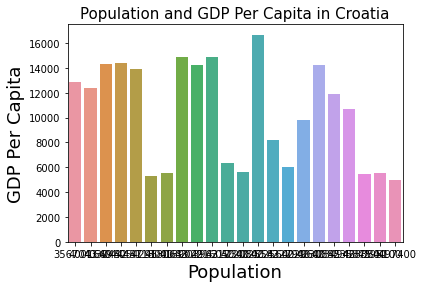

None

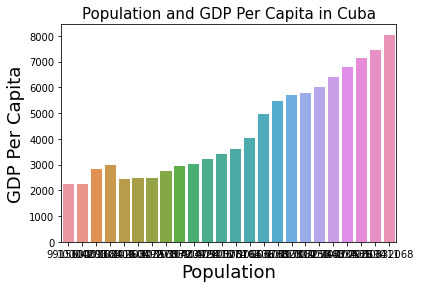

None

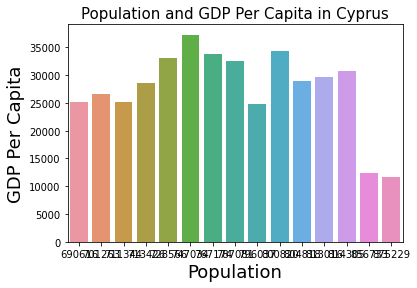

None

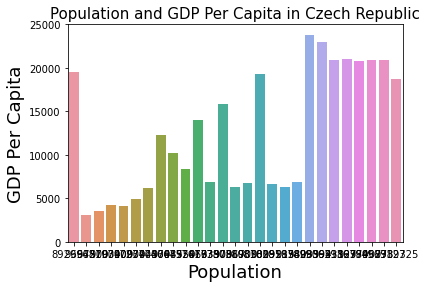

None

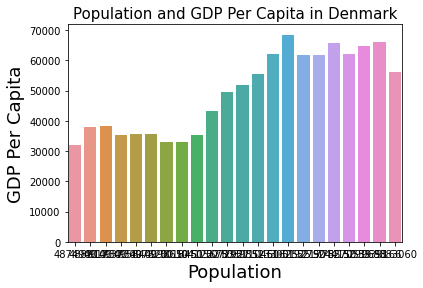

None

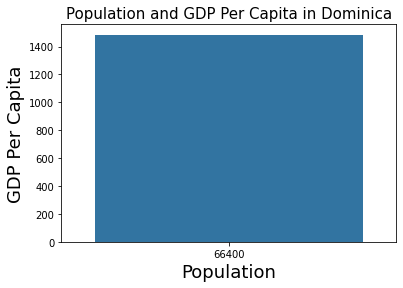

None

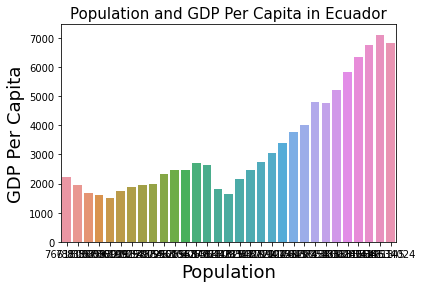

None

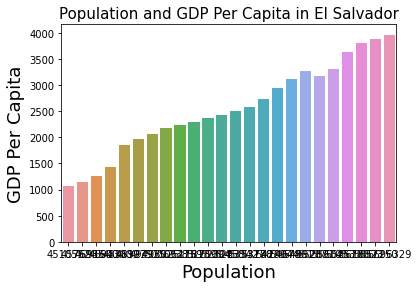

None

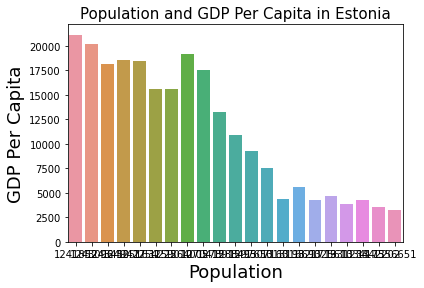

None

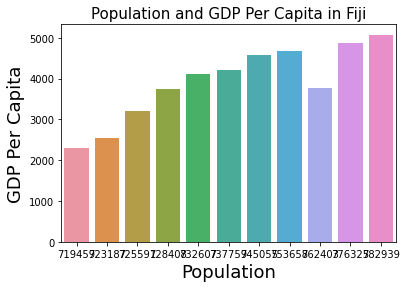

None

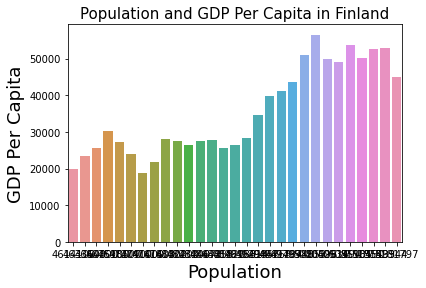

None

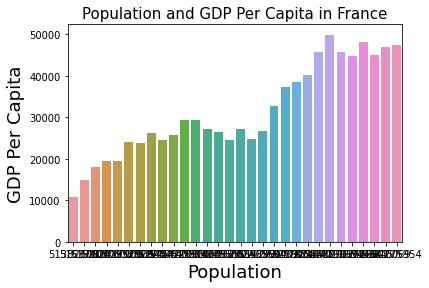

None

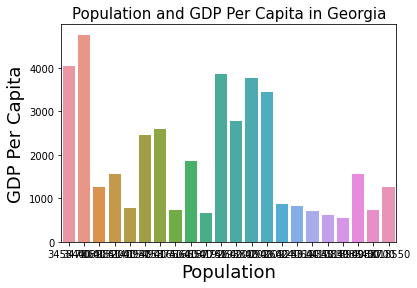

None

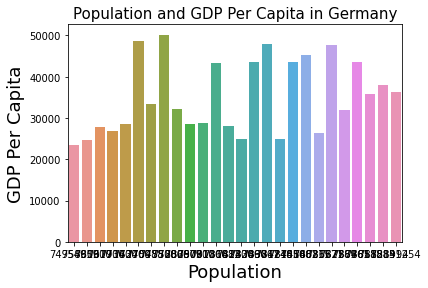

None

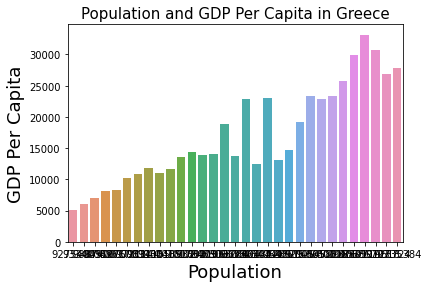

None

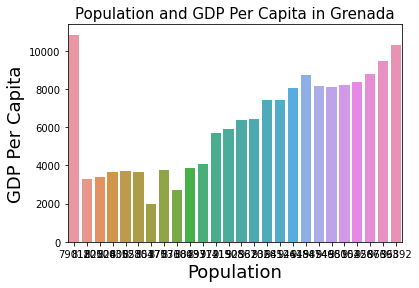

None

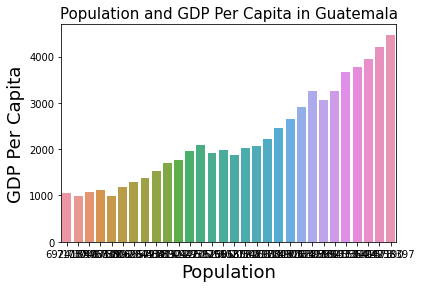

None

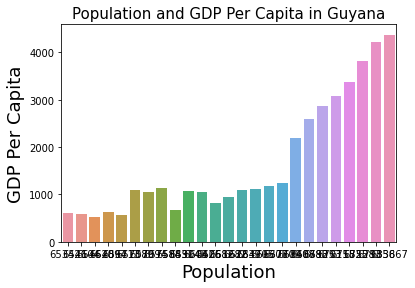

None

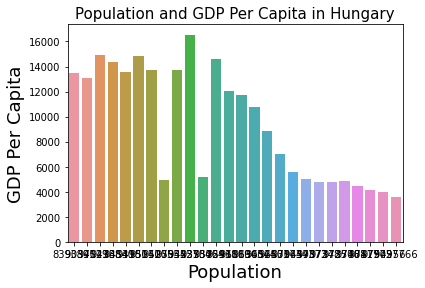

None

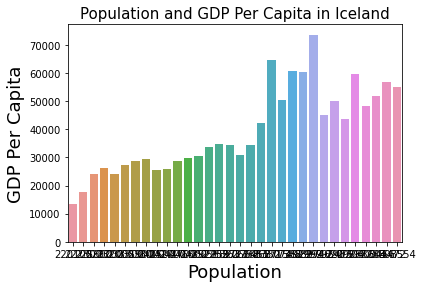

None

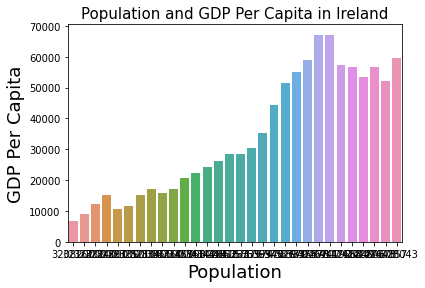

None

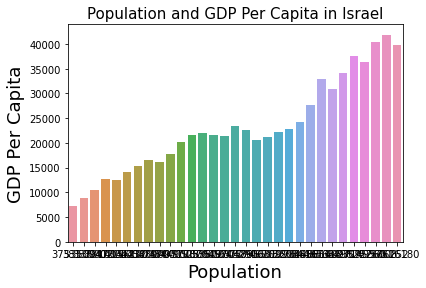

None

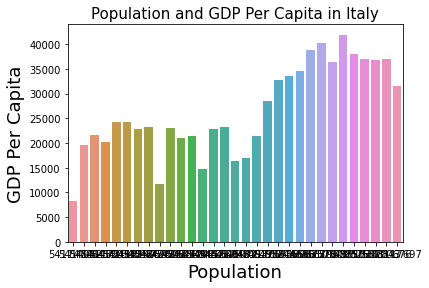

None

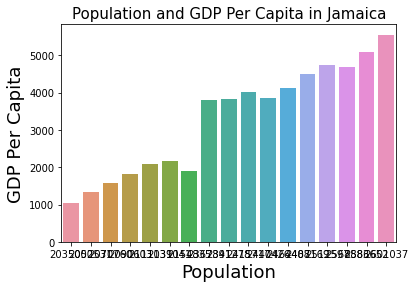

None

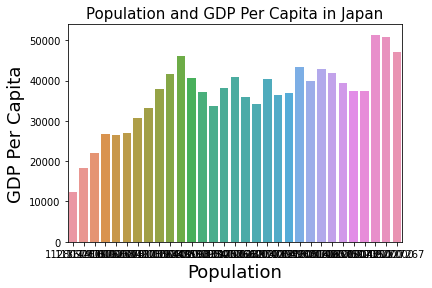

None

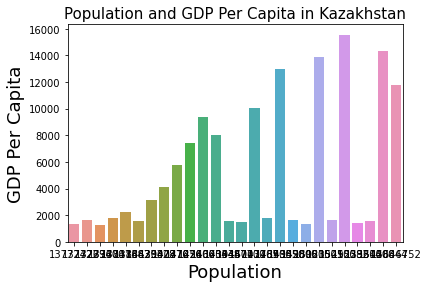

None

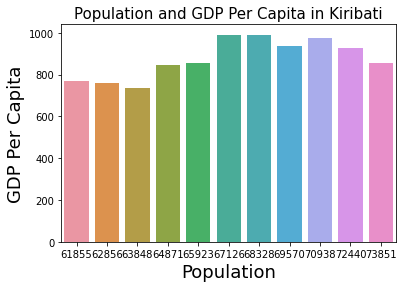

None

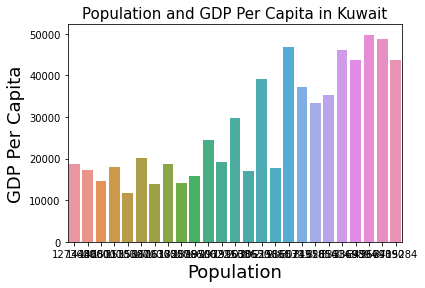

None

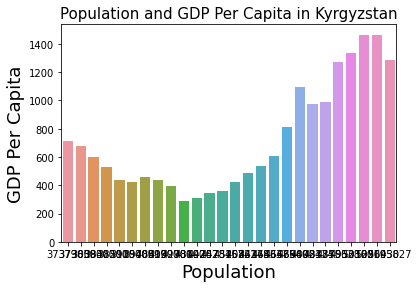

None

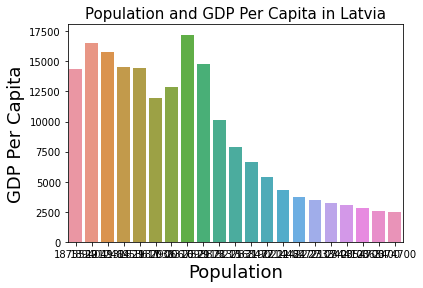

None

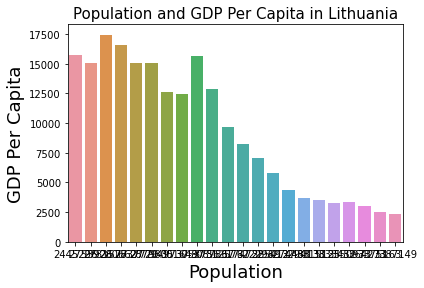

None

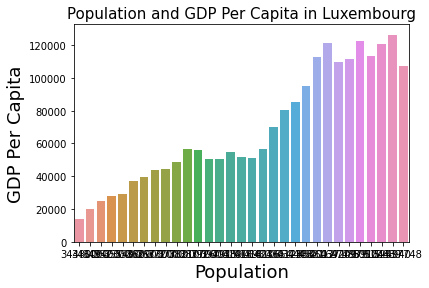

None

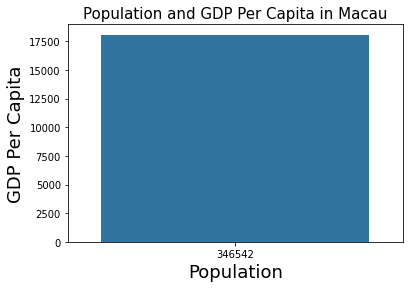

None

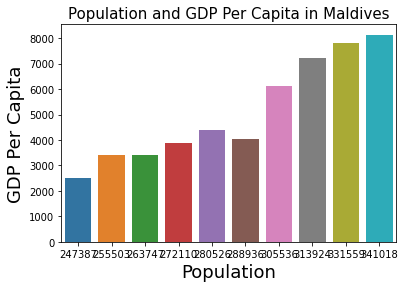

None

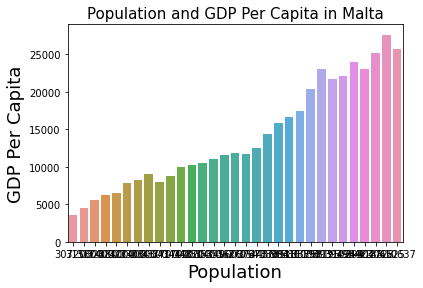

None

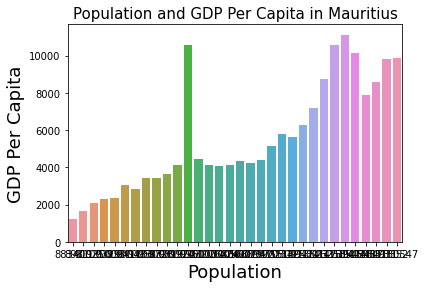

None

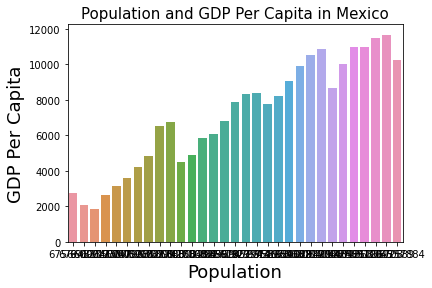

None

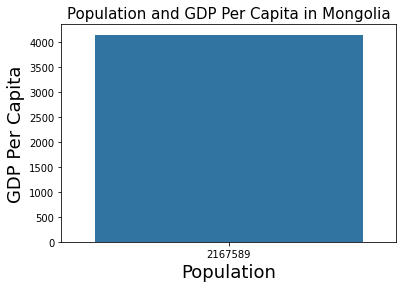

None

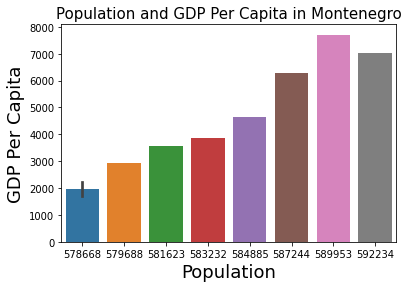

None

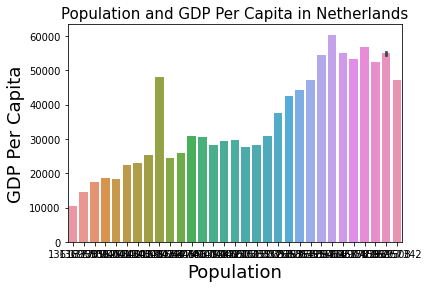

None

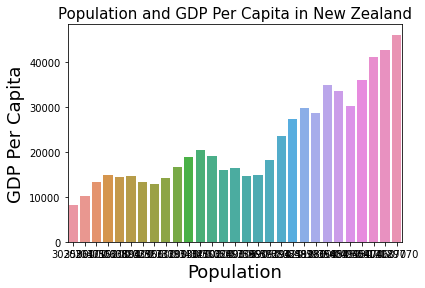

None

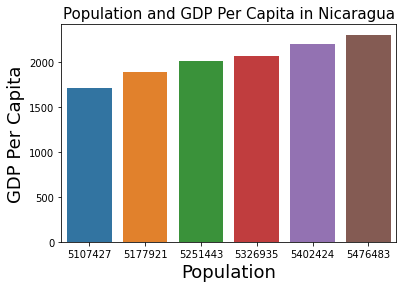

None

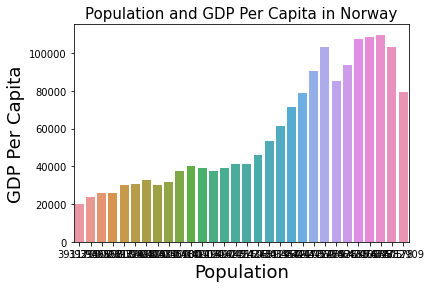

None

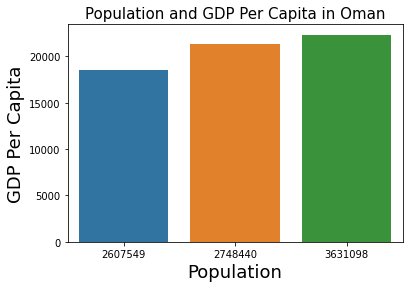

None

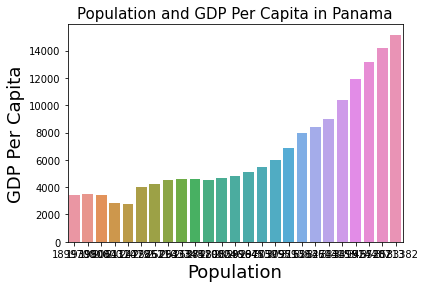

None

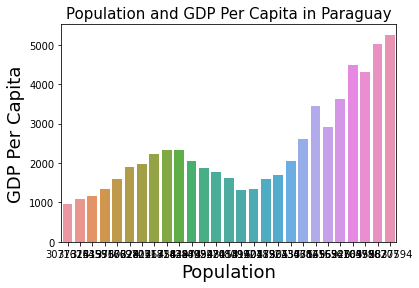

None

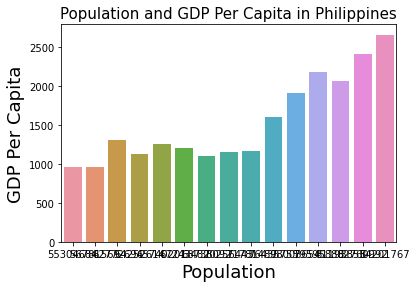

None

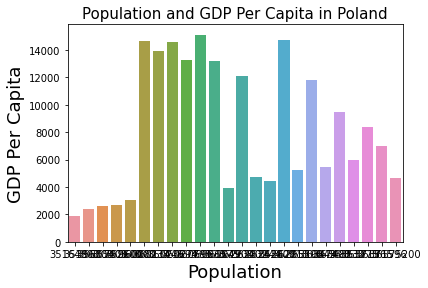

None

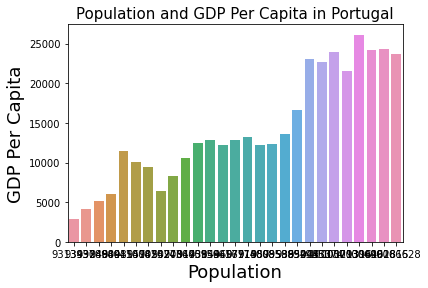

None

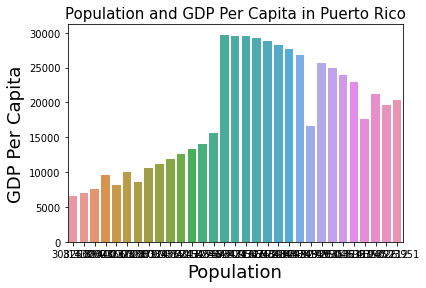

None

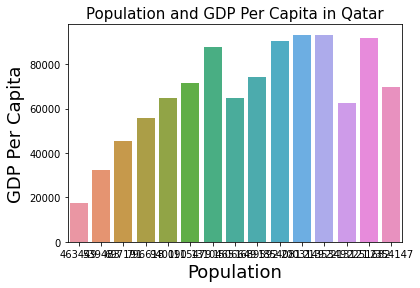

None

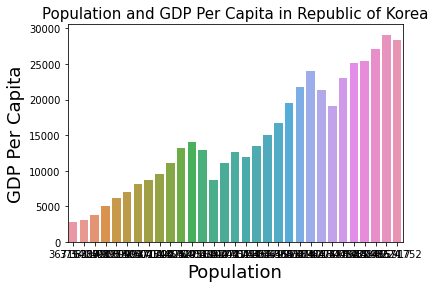

None

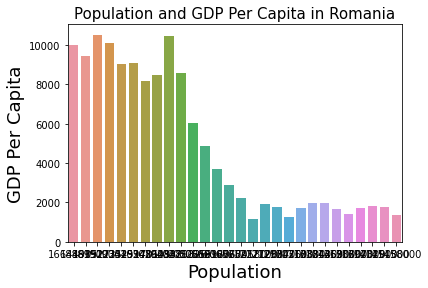

None

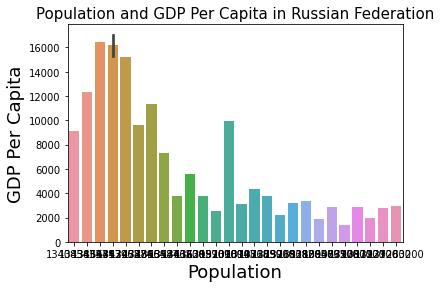

None

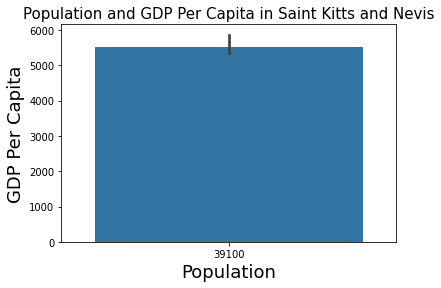

None

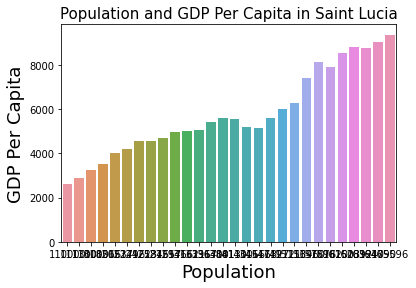

None

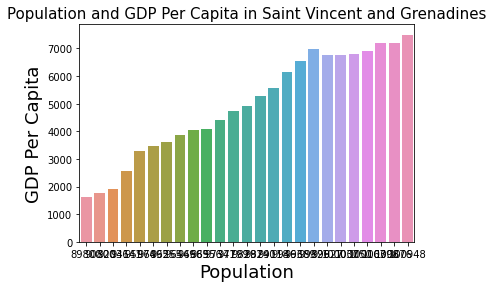

None

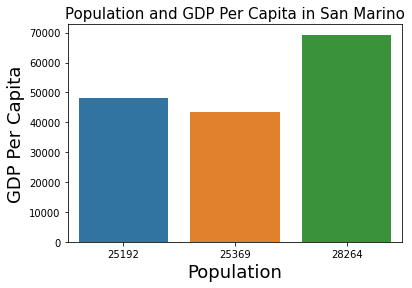

None

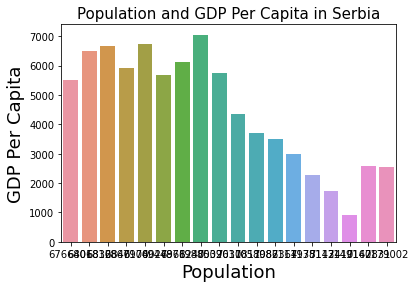

None

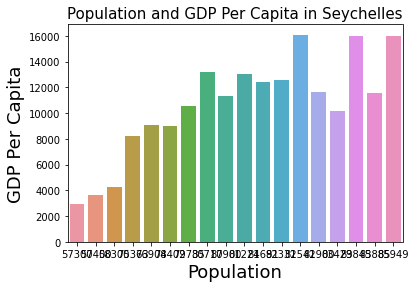

None

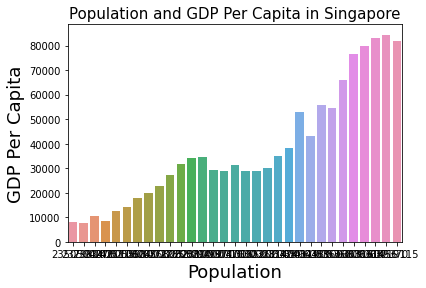

None

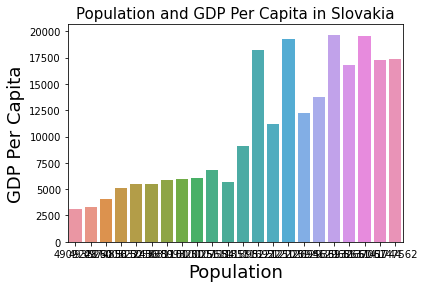

None

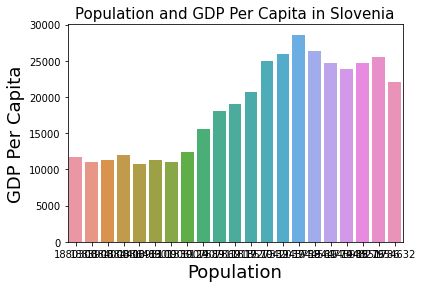

None

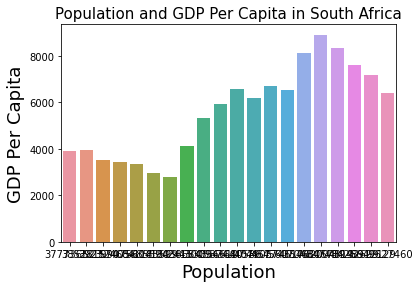

None

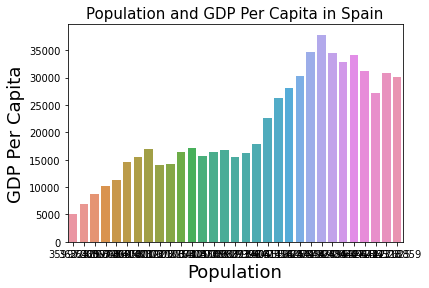

None

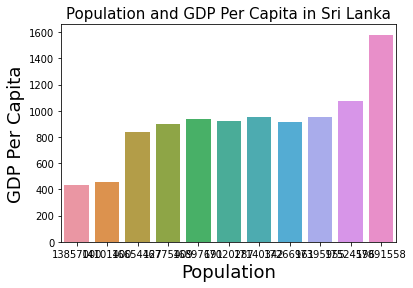

None

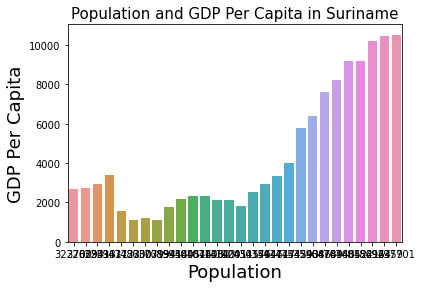

None

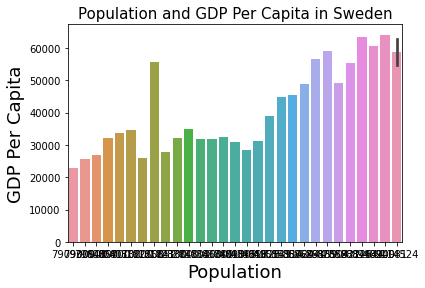

None

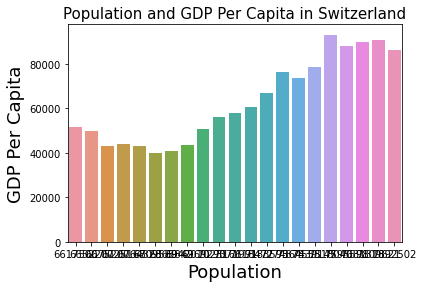

None

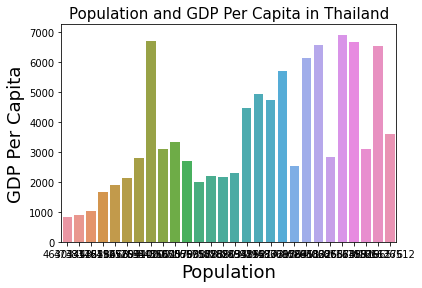

None

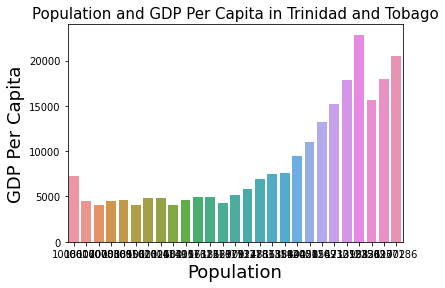

None

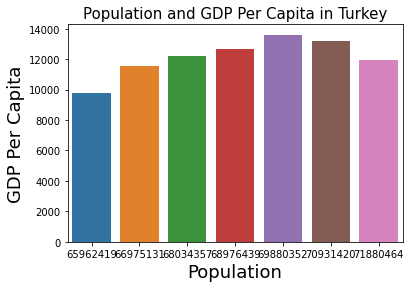

None

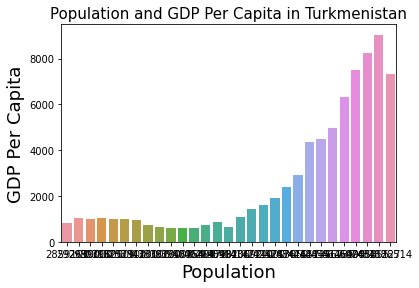

None

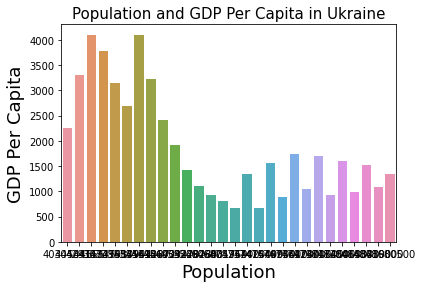

None

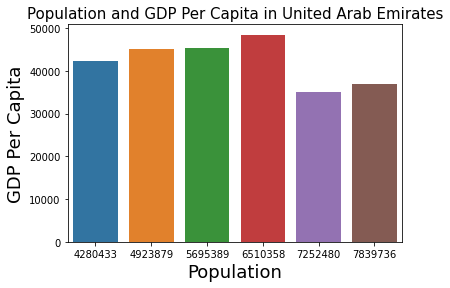

None

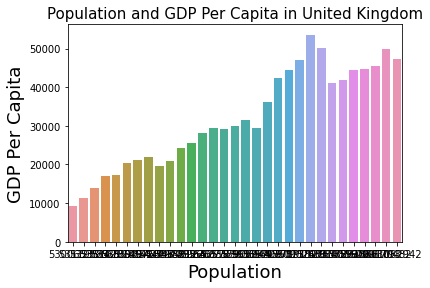

None

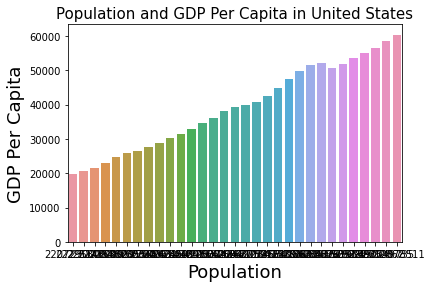

None

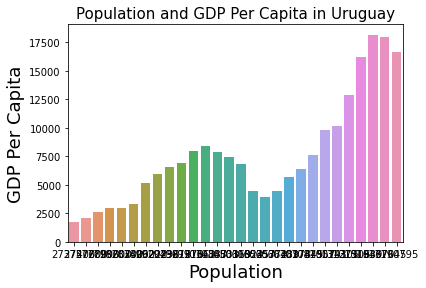

None

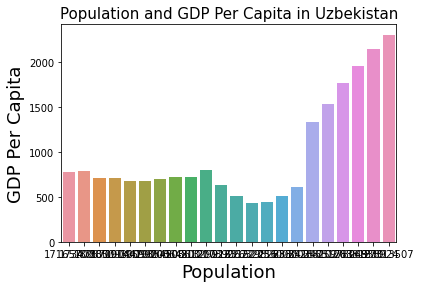

None

In [50]:
df2= df.groupby(["country", "year"]).agg({"population":'sum', 'suicides_no':'sum', "gdp_per_capita":'mean'}).reset_index()

for i in df2['country'].unique():
    plt.subplots(1,1)
    sns.barplot(x="population", y="gdp_per_capita", data=df2[df2['country'] == i])
    plt.xlabel("Population", fontsize=18)
    plt.ylabel("GDP Per Capita", fontsize=18)
    plt.title("Population and GDP Per Capita in " + i, fontsize=15)
    display(plt.show())

# Correlation between GDP(per Capita) and suicides per 100k

<AxesSubplot:>

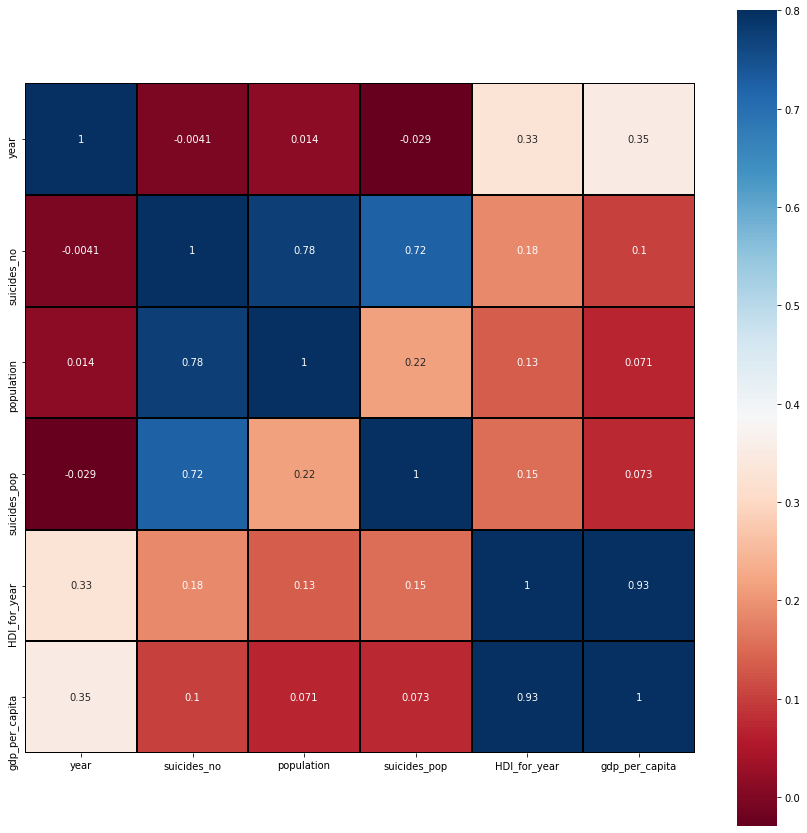

In [77]:
corr = df.corr(method='spearman')
plt.figure(figsize=(15,15))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='RdBu', linecolor='black')

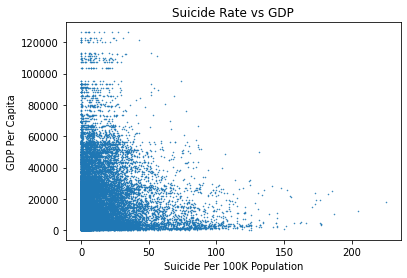

In [79]:
plt.plot("suicides_pop", 'gdp_per_capita', data=df, linestyle='', marker='o', markersize=0.5)
plt.xlabel("Suicide Per 100K Population")
plt.ylabel("GDP Per Capita")
plt.title("Suicide Rate vs GDP")
plt.show()

SpearmanrResult(correlation=0.07306331576449537, pvalue=3.02415181882464e-34)

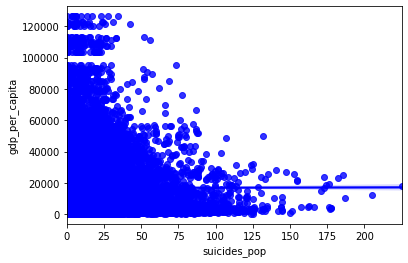

In [82]:
sns.regplot(x=df.suicides_pop, y=df.gdp_per_capita, color='b')
stats.spearmanr(df.gdp_per_capita, df.suicides_pop)

# Generation hue Gender Counter


In [93]:
df_generation = df.groupby(['generation', 'year'])['suicides_no'].sum().reset_index()
df_generation.sample(10)

,generation,year,suicides_no
58,Generation X,1996,72958
0,Boomers,1985,20771
137,Silent,2008,81242
64,Generation X,2002,41536
54,Generation X,1992,24727
53,Generation X,1991,23317
51,Generation X,1989,19786
105,Millenials,2008,28145
108,Millenials,2011,65873
13,Boomers,1998,91627


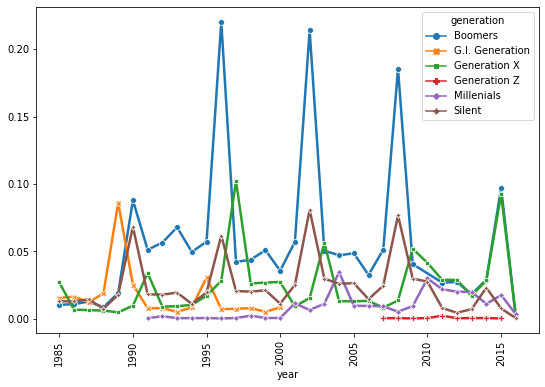

In [98]:
plt.figure(figsize=(9,6))
sns.lineplot(x="year", y=df_generation.suicides_no*100/df_reset.population, hue = "generation",
             data = df_generation, linewidth = 2.5, style = "generation", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()

As seen above graph, 75+ aged people are more tend to suicide. There might be many reason that is happening.

If we check the last table 'Boomers' Generation are most tend to suicide through out the years. 